<a href="https://colab.research.google.com/github/Nur9702/DeepLearn/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**6-modul Deep Learning negizi
**

In [1]:
!pip install fastai==2.7.18

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
#kutubhonalarni o'rnatamiz
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.5.1+cu124
2.7.18


#MNIST dataseti haqida

#MNSIT datasetning 3 va 7 raqamlarini yuklab olamiz

In [3]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)

#path.ls()
#(path/'train').ls()
#(path/'train'/'3').ls() # 3 sonining 6131 ta qo'lda yozilgan rasmlarini ko'rsatadi
#(path/'train'/'7').ls() # 7 sonining 6265 ta qo'lda yozilgan rasmlarini ko'rsatadi
#(path/'valid'/'7').ls() # 7 sonining validation uchun 1028 ta qo'lda yozilgan rasmlarini ko'rsatadi
#(path/'valid'/'3').ls() # 3 sonining validation uchun 1010 ta qo'lda yozilgan rasmlarini ko'rsatadi

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [4]:
img3_sample = threes[1]
img3 = Image.open(img3_sample)
img3

In [5]:
img7_sample = sevens[2]
img7 = Image.open(img7_sample)
img7

In [6]:
array(img3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [7]:
tensor(img3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [8]:
import pandas as pd

img3_t = tensor(img3)

df = pd.DataFrame(img3_t[4:22, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


#Piksellar o'xshashligidan foydalanib o'rtacha qaysi holat va uni idel 3 deb olamiz

In [9]:
#tensor ko'rinishiga keltirib olamiz
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]

len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

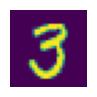

In [10]:
show_image(three_tensors[2])

In [11]:
#Stacking
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
#stacked_threes.shape
stacked_sevens.shape

torch.Size([6265, 28, 28])

<Axes: >

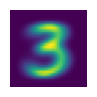

In [12]:
#ideal 3 ni topish
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

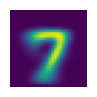

In [13]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

#Xatoliklarni olchash

Mean absolute defference (error) = MAE yoki L1 norm

Root Mean Squarred Error RMSE = L2 norm

<Axes: >

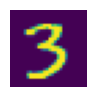

In [14]:
s_3 = stacked_threes[1]
show_image(s_3)

In [15]:
#MAE
mae = (s_3 - mean3).abs().mean()

#RMSE
rmse = ((s_3 - mean3)**2).mean().sqrt()

mae, rmse

(tensor(0.1114), tensor(0.2021))

In [16]:
#MAE
mae = (s_3 - mean7).abs().mean()

#RMSE
rmse = ((s_3 - mean7)**2).mean().sqrt()

mae, rmse

(tensor(0.1586), tensor(0.3021))

#NP array va Torch tensor lardan foydalanish


In [17]:
from fastai.vision.all import *

data = [[1,2,3],[4,5,6]] #nested list
arr = array(data) #numpy array
tns = tensor(data) #torch tensor


In [18]:
data

[[1, 2, 3], [4, 5, 6]]

In [19]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [20]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

#modelni aniqligini broadcasting orqali aniqlash



In [21]:
valid_3_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

# MAEni funkstsiyaga aylantiramiz

In [22]:
#mae xatolik funktsiyasi
def mae(a, b):
  return (a-b).abs().mean((-1, -2))

#tekshirish
mae(s_3, mean3)

valid_3_errors = mae(valid_3_tens, mean3)
valid_7_errors = mae(valid_7_tens, mean7)

valid_3_errors, valid_3_errors.shape


(tensor([0.1439, 0.1409, 0.1225,  ..., 0.1327, 0.1315, 0.1239]),
 torch.Size([1010]))

#Natijalovchi funktsiya

In [23]:
def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) < mae(x, mean3)

is_3(s_3), is_3(s_3).float()

(tensor(True), tensor(1.))

In [24]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = is_7(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# Endi bu dasturni machine learningda aniqlash
Klassifikatorga o'tkazib ko'rish, ya'ni machine o'zini o'zi o'qitib yechim topishi uchun

In [25]:
#Boshlang'ich weightsni yaratib olamiz randomly tarzda (y=wx+b)

#lossni hisoblash Loss bu xatolikni o'lchash mezoni

#step bu gradientning natijasiga ko'ra weightsni o'shirish yoki kamaytirishni ko'rsatadi

#stop bu natijamizga ko'ra jarayonni to'xtatish



In [26]:
def loss(w):
  return w**2


In [27]:
# prompt: create plotting function code

import matplotlib.pyplot as plt

def plot_function(func, start, end, num_points=100):
    x_vals = torch.linspace(start, end, num_points)
    y_vals = func(x_vals)
    plt.plot(x_vals.numpy(), y_vals.numpy())
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Plot of the Function')
    plt.grid(True)
    plt.show()

In [28]:
 #gradientni aniqlash
 w_t = torch.tensor(3., requires_grad=True)
 w_t

tensor(3., requires_grad=True)

In [29]:
loss_v = loss(w_t)
loss_v

tensor(9., grad_fn=<PowBackward0>)

In [30]:
loss_v.backward()

In [31]:
w_t.grad

tensor(6.)

#Step with learning rate

w = w+lr.grad yoki w = w-lr.grad

python tilida w + = lr * w.grad yoki w - = lr * w.grad

# Stokastic Gradient uchun to'liq misol

In [32]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

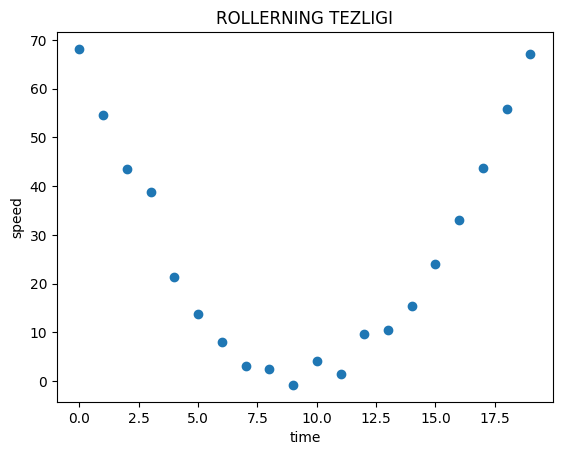

In [33]:
speed = torch.randn(20)*3+0.75*(time-9.5)**2+1

#plotting
plt.scatter(time, speed)
plt.xlabel('time')
plt.ylabel('speed')
plt.title('ROLLERNING TEZLIGI')
plt.show()

In [34]:
#Kvadratik funktsiya yaratuvchi
def f(t, paramas):
  a, b, c = paramas
  return a*(time**2)+(b*time)+c

In [35]:
# MSE mean squarred error
#loss function
def mse(preds, targets):
  return ((preds-targets)**2).mean()

In [37]:
# 1-qadam init
params = torch.randn(3).requires_grad_()
params


tensor([ 0.3383, -1.0530, -1.2885], requires_grad=True)

In [47]:
# 2-qadam predict
preds = f(time, params)
preds

tensor([-1.2885, -2.0794, -2.3370, -2.0615, -1.2529,  0.0889,  1.9638,  4.3719,
         7.3132, 10.7876, 14.7951, 19.3359, 24.4097, 30.0167, 36.1569, 42.8302,
        50.0367, 57.7764, 66.0491, 74.8551], grad_fn=<AddBackward0>)

In [48]:
# 3-qadam lossni hisoblash
loss = mse(preds, speed)
loss

tensor(758.0123, grad_fn=<MeanBackward0>)

In [49]:
# 4-qadam Gradientni hisoblash
loss.backward()
params.grad

tensor([3120.9099,  183.0871,   -8.6404])

In [50]:
# 5-qadam Step
lr = 1e-5
params.data-=lr*params.grad.data
params.grad = None

In [51]:
# 6-qadam 2-qadamga qaytib takroran predict qilish
preds = f(time, params)
# yangi qiymat uchun xatolikni hisoblash
mse(preds, speed)

tensor(687.8837, grad_fn=<MeanBackward0>)

In [53]:
def apply_step(params, prnn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prnn: print(loss.item())
  return preds


In [54]:
# 7-qadam istalgan epochgacha qadamni o'qitish
for epoch in range(10):
  apply_step(params)

687.8836669921875
674.6068115234375
672.087890625
671.6048583984375
671.5070190429688
671.4820556640625
671.4708862304688
671.46240234375
671.454345703125
671.4464111328125


In [56]:
# Import necessary libraries
import matplotlib.pyplot as plt
import torch

# ... (Your existing code) ...

def show_preds(preds, ax=None):
    """Plots predictions against actual values."""
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_xlabel('time')
    ax.set_ylabel('speed')
    ax.set_title('ROLLERNING TEZLIGI')

# ... (Rest of your code, including the loop with `apply_step` and visualization) ...

671.4384155273438
671.4305419921875
671.422607421875
671.4146728515625
671.4066772460938
671.3988037109375
671.3909301757812
671.3829345703125
671.3751220703125
671.3671875


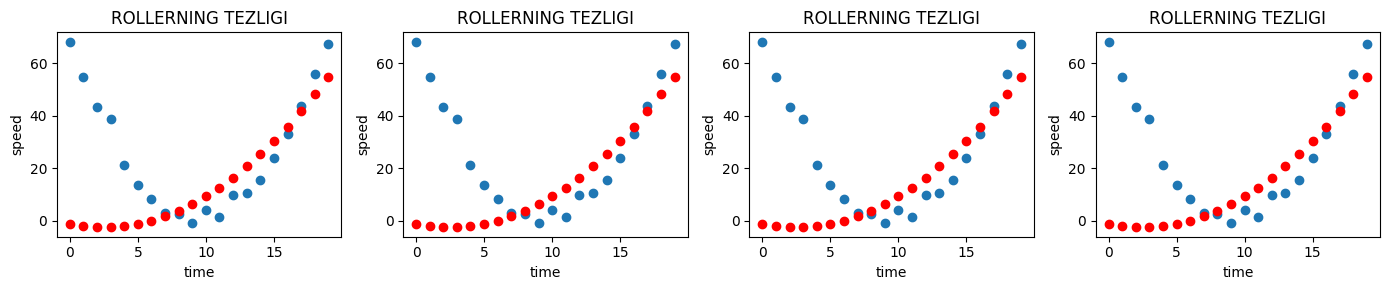

In [58]:
# 7-qadam istalgan epochgacha qadamni o'qitish
for epoch in range(10):
  apply_step(params)

# ... (Rest of your existing code) ...

# Change `prn` to `prnn` in the `apply_step` call within the loop
_ , axs = plt.subplots(1, 4, figsize=(14, 3) )
for ax in axs: # Change axs to ax here to avoid shadowing outer variable
  show_preds(apply_step(params, prnn=False), ax) # Changed 'prn' to 'prnn' here
  plt.tight_layout()